<a href="https://colab.research.google.com/github/Rishiddh/datasciencecoursera/blob/master/Kadamane_SeedlingCDD_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
install.packages("tidyverse")
install.packages("ggplot2"); install.packages("ggrepel")
install.packages("cowplot"); install.packages("ggh4x")
install.packages("mgcv"); install.packages("ggeffects")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘datawizard’




In [13]:
library(tidyverse)
library(ggplot2); library(ggrepel);library(cowplot); library(ggh4x)
library(mgcv); library(ggeffects)


Attaching package: ‘ggeffects’


The following object is masked from ‘package:cowplot’:

    get_title




In [18]:
################################## # Trait x CDD x Avail.P  # model 8 final
IG.cdd.Mar25.lvl3<- read.csv("/CDD_data_CoLab_13Nov25.csv")

Mod.dat.TRT.AvailP <- IG.cdd.Mar25.lvl3 %>% select("SUBPLOT","plotfull","Species","ID_full","initial_ht","ADDED",
                                                 "census_values","survival","s_count","con_count","het_count",
                                                 "cnpy_open_RR","avg_moist", "NH4.N", "NO3.N", "Avail.P",
                                                 "SLA_median", "LDMC_median", "season") %>%
  filter(!is.na(survival), !is.na(Avail.P), !is.na(SLA_median), initial_ht<=70, initial_ht >=1) %>%
  mutate_at(c('initial_ht', 'survival','s_count', 'con_count','het_count', 'cnpy_open_RR', 'avg_moist','NH4.N', 'NO3.N', 'Avail.P', 'SLA_median','LDMC_median'), as.numeric) %>%
  mutate_if(is.character, as.factor)

#Quantiles for env and trt
q3sla=round(quantile(Mod.dat.TRT.AvailP$SLA_median, probs = c(0.05, 0.5, 0.95)), digits = 2)
q3ldmc=round(quantile(Mod.dat.TRT.AvailP$LDMC_median, probs = c(0.05, 0.5, 0.95)), digits = 2)
q3AP=round(quantile(Mod.dat.TRT.AvailP$Avail.P, probs = c(0.05, 0.5, 0.95)), digits=2)

q2sla=round(quantile(Mod.dat.TRT.AvailP$SLA_median, probs = c(0.05, 0.95)), digits = 2)
q2ldmc=round(quantile(Mod.dat.TRT.AvailP$LDMC_median, probs = c(0.05, 0.95)), digits = 2)
q2AP=round(quantile(Mod.dat.TRT.AvailP$Avail.P, probs = c(0.05, 0.95)), digits=2)

In [19]:
IG_GAM_Nov24_SLA_AvailP_K7 <- gam(survival ~ season +
                            s(con_count, k = 4) + s(Avail.P, k=7) +
                            s(s_count, k=4) + s(SLA_median, k=6)+
                            ti(con_count, Avail.P, k = c(4,6)) +
                            ti(con_count, SLA_median, k= c(4,3)) +
                            ti(SLA_median, Avail.P, k=c(5,6)) +
                            ti(con_count, SLA_median, Avail.P, k = c(4,3,6)) + #4,5,5
                            ti(s_count, Avail.P, k=c(4,6)) +
                            ti(s_count, SLA_median, k=c(4,3)) +
                            ti(s_count, SLA_median, Avail.P, k=c(4,3,6)) + #4,5,5
                            s(log(initial_ht), k=10)+
                            s(Species, bs = "re", k = 20) +
                            s(Species, con_count, Avail.P, bs = "re", k = c(20,4,4))+
                            s(Species, s_count, Avail.P, bs = "re", k = c(18,4,4))+
                            s(plotfull, bs="re", k=10)+s(census_values, bs="re", k=3),
                          family = binomial(link = "cloglog"),
                          data = Mod.dat.TRT.AvailP,
                          control = gam.control(nthreads = 24),
                          method = "REML")

[1] 23110.25

,k',edf,k-index,p-value
s(con_count),3,2.927204,1.0000263,0.8875
s(Avail.P),6,1.000805,1.0059121,0.9675
s(s_count),3,1.671813,0.9836438,0.4875
s(SLA_median),5,1.000320,0.9701460,0.1800
"ti(con_count,Avail.P)",15,5.797705,0.9691015,0.1550
"ti(con_count,SLA_median)",6,1.850398,0.9643750,0.0725
"ti(SLA_median,Avail.P)",20,1.007613,0.9732200,0.2225
"ti(con_count,SLA_median,Avail.P)",30,4.479671,0.9462633,0.0000
"ti(s_count,Avail.P)",15,1.002309,0.9621108,0.0425
"ti(s_count,SLA_median)",6,1.003372,0.9716452,0.1575



Family: binomial 
Link function: cloglog 

Formula:
survival ~ season + s(con_count, k = 4) + s(Avail.P, k = 7) + 
    s(s_count, k = 4) + s(SLA_median, k = 6) + ti(con_count, 
    Avail.P, k = c(4, 6)) + ti(con_count, SLA_median, k = c(4, 
    3)) + ti(SLA_median, Avail.P, k = c(5, 6)) + ti(con_count, 
    SLA_median, Avail.P, k = c(4, 3, 6)) + ti(s_count, Avail.P, 
    k = c(4, 6)) + ti(s_count, SLA_median, k = c(4, 3)) + ti(s_count, 
    SLA_median, Avail.P, k = c(4, 3, 6)) + s(log(initial_ht), 
    k = 10) + s(Species, bs = "re", k = 20) + s(Species, con_count, 
    Avail.P, bs = "re", k = c(20, 4, 4)) + s(Species, s_count, 
    Avail.P, bs = "re", k = c(18, 4, 4)) + s(plotfull, bs = "re", 
    k = 10) + s(census_values, bs = "re", k = 3)

Parametric coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.007871   0.162462   0.048    0.961
seasonwinter 0.036553   0.078506   0.466    0.641

Approximate significance of smooth terms:
                           

    Species        Avail.P        con_count         s_count      
 PSYNIG :5806   Min.   :0.200   Min.   :  0.00   Min.   :  1.00  
 DIMLON :3705   1st Qu.:0.200   1st Qu.:  1.00   1st Qu.: 13.00  
 SYZRUB :1985   Median :0.800   Median :  4.00   Median : 23.00  
 REIANA :1322   Mean   :1.088   Mean   : 17.79   Mean   : 36.31  
 SYMRAC : 917   3rd Qu.:1.614   3rd Qu.: 19.00   3rd Qu.: 42.00  
 DICGEL : 717   Max.   :9.342   Max.   :247.00   Max.   :267.00  
 (Other):6578                                                    
   initial_ht      SLA_median           plotfull     census_values
 Min.   : 2.40   Min.   :11.37   DG_L3_P2   :  538   APR22:2913   
 1st Qu.: 8.70   1st Qu.:17.40   MG_L8_P5   :  493   MAR24:2865   
 Median :13.80   Median :19.60   MG_L9_P2   :  464   MAY23:2887   
 Mean   :17.46   Mean   :21.01   NCF_90     :  452   NOV21:2895   
 3rd Qu.:23.80   3rd Qu.:26.77   MG_L9_P7   :  331   NOV22:3459   
 Max.   :61.00   Max.   :26.77   KT_20_L4_P8:  313   NOV23:3230   
   

Warning message in predict.gam(GAM.AvailP.SLA, newdata = ME_cddAvailPSLA, type = "response", :
“factor levels Species not in original fit”
Warning message in predict.gam(GAM.AvailP.SLA, newdata = ME_cddAvailPSLA, type = "response", :
“factor levels plot not in original fit”
Warning message in predict.gam(GAM.AvailP.SLA, newdata = ME_cddAvailPSLA, type = "response", :
“factor levels census not in original fit”


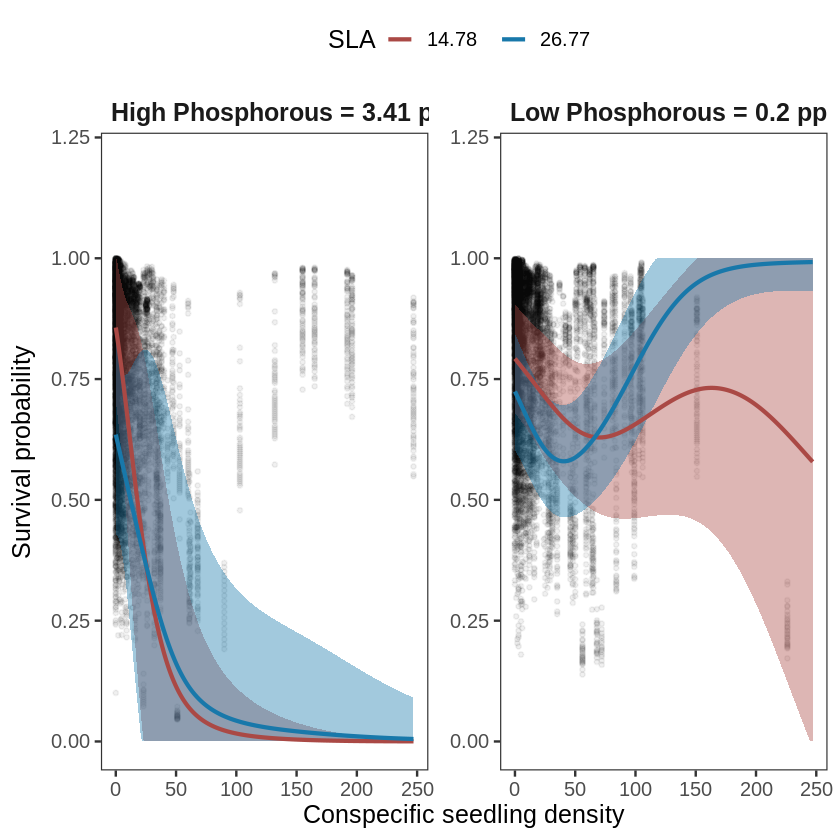

In [20]:
#IG_GAM_Nov24_SLA_AvailP_K
GAM.AvailP.SLA = IG_GAM_Nov24_SLA_AvailP_K7

AIC(GAM.AvailP.SLA)
k.check(GAM.AvailP.SLA)
summary(GAM.AvailP.SLA)


#### plotting ####
# data set for points
IGGAM_Nov24_SLA_AP_Pt <- Mod.dat.TRT.AvailP %>% group_by(Species) %>%
  tidyr::expand(nesting(Avail.P, con_count, s_count, initial_ht, SLA_median,plotfull,census_values, season)) %>% ungroup()

IGGAM_Nov24_SLA_AP_Pt_pred <- bind_cols(IGGAM_Nov24_SLA_AP_Pt %>%
                                       mutate(fitted = (predict.gam(GAM.AvailP.SLA,
                                                                    type = "response",
                                                                    newdata  = IGGAM_Nov24_SLA_AP_Pt))))%>%
  mutate(AvailP_grp = ifelse(Avail.P<1,"low","high"),sla_grp = ifelse(SLA_median < 20.84,"low","high"))

IGGAM_Nov24_SLA_AP_Pt_pred$AvailP_grp<- factor(IGGAM_Nov24_SLA_AP_Pt_pred$AvailP_grp , levels = c("low", "high"))
IGGAM_Nov24_SLA_AP_Pt_pred$sla_grp<- factor(IGGAM_Nov24_SLA_AP_Pt_pred$sla_grp , levels = c("low", "high"))
summary(IGGAM_Nov24_SLA_AP_Pt_pred)


# plot Q3 CNDD x SLA x AvailP
#data
ME_cddAvailPSLA<- with(Mod.dat.TRT.AvailP,
                     expand.grid(Species = "Species",
                                 season = "winter",
                                 con_count = seq(min(con_count), max(con_count), by=1),
                                 Avail.P = q2AP,
                                 SLA_median = q2sla,
                                 s_count = median(s_count),
                                 initial_ht = median(initial_ht), # 0.5 quantile
                                 plotfull = "plot",
                                 census_values = "census"))


ME_cddAvailPSLA_pred<- bind_cols(ME_cddAvailPSLA,
                               as.data.frame(predict.gam(GAM.AvailP.SLA,
                                                         newdata  = ME_cddAvailPSLA,
                                                         type="response",
                                                         terms = c("s(con_count)", "s(Avail.P)", "s(SLA_median)",
                                                                   "ti(con_count,Avail.P)",
                                                                   "ti(con_count,SLA_median)",
                                                                   "ti(SLA_median,Avail.P)",
                                                                   "ti(con_count,SLA_median,Avail.P)"),
                                                         se.fit = TRUE)))


ME_cddAvailPSLA_pred_trns<- ME_cddAvailPSLA_pred %>%
  mutate(CI.low = (fit - (1.96*se.fit)), CI.high = (fit + (1.96*se.fit)),
         Avail.P=as.character(Avail.P), SLA_median = as.character(SLA_median)) %>%
  mutate(CI.low = ifelse(CI.low < 0,0,CI.low), CI.high =ifelse(CI.high >1,1,CI.high))

#plot
p.sla.cdd.ap <- ggplot(data = ME_cddAvailPSLA_pred_trns) +
  ylab("Survival probability") + xlab("Conspecific seedling density")+
  ylim(0.0, 1.2) + #scale_y_continuous(breaks= c(0.00, 0.25, 0.50, 0.75, 1.00))+
  geom_point(data = IGGAM_Nov24_SLA_AP_Pt_pred %>% ungroup() %>% mutate(Avail.P = ifelse(Avail.P < q3AP[2], q3AP[1], q3AP[3])),
             aes(x=con_count, y=fitted), inherit.aes = F,
             alpha = 0.06, size = 1)+
  geom_ribbon(aes(x=con_count, y=fit, fill = SLA_median,
                  group = SLA_median,
                  ymin = CI.low, ymax = CI.high), alpha = 0.4,
              show.legend=FALSE)+
  geom_line(aes(x=con_count, y=fit, color = SLA_median,
                group = SLA_median), linewidth=1.2) +
  facet_wrap(~Avail.P, labeller = label_both)+
  facet_grid2(~factor(Avail.P, levels = c(q2AP[2], q2AP[1]),
                      labels = c(paste0("(a)              High Phosphorous = ", q2AP[2] ," ppm           "),
                                 paste0("(b)            Low Phosphorous = ", q2AP[1], " ppm            "))),
              axes = TRUE,
              #strip = strip_themed(background_x = elem_list_rect(fill = c("gold2","forestgreen")))
  )+
  scale_color_manual(values=c("#aa4945","#1878aa"), name="SLA")+
  scale_fill_manual(values=c("#aa4945","#1878aa"))+
  theme_bw(base_size = 15)+
  theme(panel.grid = element_blank(), legend.position="top",
        strip.text = element_text(face="bold", size=15),
        strip.background = element_blank()) #, strip.background =element_rect(fill= c("#aa4945","#1878aa"))

plot(p.sla.cdd.ap)


In [23]:
save.image(file = "/my_workspace.RData")

In [ ]:
################################## # Trait x CDD x Avail.P  # model 8 final
IG.cdd.Mar25.lvl3<- read.csv("/CDD_data_CoLab_13Nov25.csv")

Mod.dat.TRT.AvailP <- IG.cdd.Mar25.lvl3 %>% select("SUBPLOT","plotfull","Species","ID_full","initial_ht","ADDED",
                                                 "census_values","survival","s_count","con_count","het_count",
                                                 "cnpy_open_RR","avg_moist", "NH4.N", "NO3.N", "Avail.P",
                                                 "SLA_median", "LDMC_median", "season") %>%
  filter(!is.na(survival), !is.na(Avail.P), !is.na(SLA_median), initial_ht<=70, initial_ht >=1) %>%
  mutate_at(c('initial_ht', 'survival','s_count', 'con_count','het_count', 'cnpy_open_RR', 'avg_moist','NH4.N', 'NO3.N', 'Avail.P', 'SLA_median','LDMC_median'), as.numeric) %>%
  mutate_if(is.character, as.factor)

#Quantiles for env and trt
q3sla=round(quantile(Mod.dat.TRT.AvailP$SLA_median, probs = c(0.05, 0.5, 0.95)), digits = 2)
q3ldmc=round(quantile(Mod.dat.TRT.AvailP$LDMC_median, probs = c(0.05, 0.5, 0.95)), digits = 2)
q3AP=round(quantile(Mod.dat.TRT.AvailP$Avail.P, probs = c(0.05, 0.5, 0.95)), digits=2)

q2sla=round(quantile(Mod.dat.TRT.AvailP$SLA_median, probs = c(0.05, 0.95)), digits = 2)
q2ldmc=round(quantile(Mod.dat.TRT.AvailP$LDMC_median, probs = c(0.05, 0.95)), digits = 2)
q2AP=round(quantile(Mod.dat.TRT.AvailP$Avail.P, probs = c(0.05, 0.95)), digits=2)

In [ ]:
IG_GAM_Nov24_LDMC_AvailP <- gam(survival ~ season +
                             s(con_count, k = 4) + s(Avail.P, k=5) +
                             s(s_count, k=4) + s(LDMC_median, k=6)+
                             ti(con_count, Avail.P, k = c(4,4)) +
                             ti(con_count, LDMC_median, k= c(4,3)) +
                             ti(LDMC_median, Avail.P, k=c(5,4)) +
                             ti(con_count, LDMC_median, Avail.P, k = c(4,3,4)) +
                             ti(s_count, Avail.P, k=c(4,4)) +
                             ti(s_count, LDMC_median, k=c(4,3)) +
                             ti(s_count, LDMC_median, Avail.P, k=c(4,3,4)) +
                             s(log(initial_ht), k=10)+
                             s(Species, bs = "re", k = 20) +
                             s(Species, con_count, Avail.P, bs = "re", k = c(20,4,4))+
                             s(Species, s_count, Avail.P, bs = "re", k = c(20,4,4))+
                             s(plotfull, bs="re", k=10)+s(census_values, bs="re", k=4),
                           family = binomial(link = "cloglog"),
                           data = Mod.dat.TRT.AvailP,
                           control = gam.control(nthreads = 12),
                           method = "REML")

In [ ]:
GAM.AvailP.LDMC = IG_GAM_Nov24_LDMC_AvailP
AIC(GAM.AvailP.LDMC)
k.check(GAM.AvailP.LDMC)
summary(GAM.AvailP.LDMC)

# data set for points
IGGAM_Nov24_LDMC_Pt <- Mod.dat.TRT.AvailP %>% group_by(Species) %>%
  tidyr::expand(nesting(Avail.P, con_count, s_count, initial_ht, LDMC_median,plotfull,census_values, season)) %>% ungroup()

IGGAM_Nov24_LDMC_Pt_pred <- bind_cols(IGGAM_Nov24_LDMC_Pt %>%
                                        mutate(fitted = (predict.gam(GAM.AvailP.LDMC,
                                                                     type = "response",
                                                                     newdata  = IGGAM_Nov24_LDMC_Pt))))%>%
  mutate(AvailP_grp = ifelse(Avail.P<1,"low","high"),ldmc_grp = ifelse(LDMC_median < q3ldmc[2],"low","high"))

IGGAM_Nov24_LDMC_Pt_pred$AvailP_grp<- factor(IGGAM_Nov24_LDMC_Pt_pred$AvailP_grp , levels = c("low", "high"))
IGGAM_Nov24_LDMC_Pt_pred$ldmc_grp<- factor(IGGAM_Nov24_LDMC_Pt_pred$ldmc_grp , levels = c("low", "high"))
summary(IGGAM_Nov24_LDMC_Pt_pred)

# plot Q3 CNDD x LDMC x Canopy
#data
ME_cddAvailPLDMC<- with(Mod.dat.TRT.AvailP,
                      expand.grid(Species = "Species",
                                  season = "winter",
                                  con_count = seq(min(con_count), max(con_count), by=1),
                                  Avail.P = q2AP,
                                  LDMC_median = q2ldmc,
                                  s_count = median(s_count),
                                  initial_ht = median(initial_ht), # 0.5 quantile
                                  plotfull = "plot",
                                  census_values = "census"))


ME_cddAvailPLDMC_pred<- bind_cols(ME_cddAvailPLDMC,
                                as.data.frame(predict.gam(GAM.AvailP.LDMC,
                                                          newdata  = ME_cddAvailPLDMC,
                                                          type="response",
                                                          terms = c("s(con_count)", "s(Avail.P)", "s(LDMC_median)",
                                                                    "ti(con_count,Avail.P)",
                                                                    "ti(con_count,LDMC_median)",
                                                                    "ti(LDMC_median,Avail.P)",
                                                                    "ti(con_count,LDMC_median,Avail.P)"),
                                                          se.fit = TRUE)))

#summary(GAM.AvailP.LDMC.check3)

ME_cddAvailPLDMC_pred_trns<- ME_cddAvailPLDMC_pred %>%
  mutate(CI.low = (fit - (1.96*se.fit)), CI.high = (fit + (1.96*se.fit)),
         Avail.P=as.character(Avail.P), LDMC_median = as.character(LDMC_median)) %>%
  mutate(CI.low = ifelse(CI.low < 0,0,CI.low), CI.high =ifelse(CI.high >1,1,CI.high))
#summary(ME_cddAvailPLDMC_pred_trns)


In [ ]:
#plot
p.ldmc.cdd.co <- ggplot(data = ME_cddAvailPLDMC_pred_trns) +
  ylab("Survival probability") + xlab("Conspecific seedling density")+
  ylim(0.0, 1.2) +
  geom_point(data = IGGAM_Nov24_LDMC_Pt_pred %>% ungroup() %>% mutate(Avail.P = ifelse(Avail.P < 1.1, 0.45, 2.63)),
             aes(x=con_count, y=fitted), inherit.aes = F,
             alpha = 0.06, size = 1)+
  geom_ribbon(aes(x=con_count, y=fit, fill = LDMC_median,
                  group = LDMC_median,
                  ymin = CI.low, ymax = CI.high), alpha = 0.4,
              show.legend=FALSE)+
  geom_line(aes(x=con_count, y=fit, color = LDMC_median,
                group = LDMC_median), size=1.2) +
  facet_wrap(~Avail.P, labeller = label_both)+
  facet_grid2(~factor(Avail.P, levels = c(q2AP[2], q2AP[1]),
                      labels = c(paste0("(a)              Open canopy = ", q2AP[2] ," %           "),
                                 paste0("(b)            Closed canopy = ", q2AP[1], " %            "))),
              #strip = strip_themed(background_x = elem_list_rect(fill = c("gold2","forestgreen")))
              axes = TRUE,
  )+
  scale_color_manual(values=c("#aa4945","#1878aa"), name="LDMC")+
  scale_fill_manual(values=c("#aa4945","#1878aa"))+
  theme_bw(base_size = 15)+
  theme(panel.grid = element_blank(), legend.position="top",
        strip.text = element_text(face="bold", size=15),
        strip.background = element_blank()) #, strip.background =element_rect(fill= c("#aa4945","#1878aa"))